In [2]:
#Read the datasets

import pandas as pd

path = "/content/Electric_Vehicle_Population_Data_Excel_sheet (1).xlsx"

data = pd.read_excel(path)

data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
#Info about columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
#Finding null values

data.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64


/tmp/ipython-input-2261476688.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoptation_by_year.index, y=ev_adoptation_by_year.values, palette="rocket")


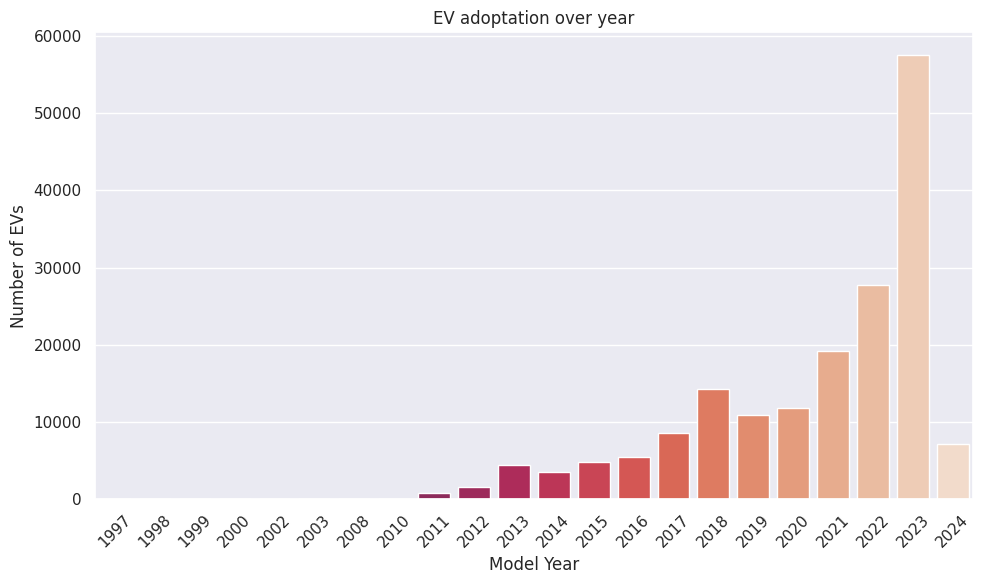

In [5]:
#EV adoptation over year: Analyze the growth of EV registerd by model year

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,6))

ev_adoptation_by_year = data['Model Year'].value_counts().sort_index()

print(ev_adoptation_by_year)

sns.barplot(x=ev_adoptation_by_year.index, y=ev_adoptation_by_year.values, palette="rocket")

plt.title("EV adoptation over year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')
City           County   
Seattle        King         29447
Bellevue       King          8930
Redmond        King          6478
Kirkland       King          5362
Sammamish      King          5280
                            ...  
Gold Bar       King             1
Prairie Ridge  Pierce           1
Kapowsin       Pierce           1
Shoreline      Snohomish        1
Startup        Snohomish        1
Length: 113, dtype: int64


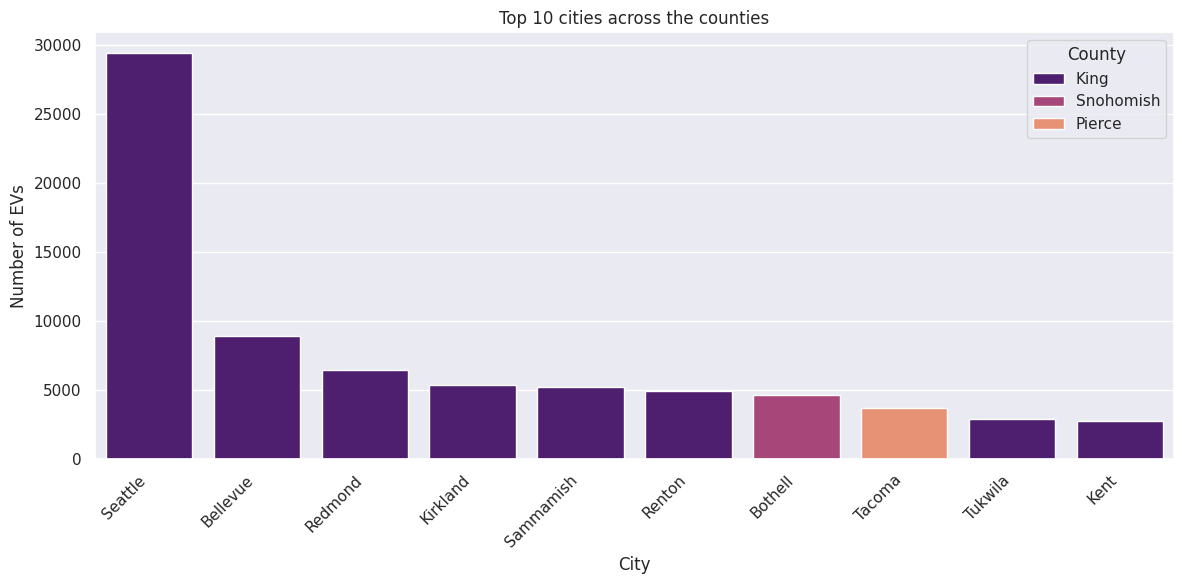

In [6]:
#Select top 3 counties based on EV registrations and then we  will analyze the distributions of EVs within  the cities of those top 3 counties

ev_county_distribution = data['County'].value_counts()

top_3_counties = ev_county_distribution.head(3).index

print(top_3_counties)

#Filtering dataset for those top counties

top_counties = data[data['County'].isin(top_3_counties)].copy() # Added .copy() to avoid SettingWithCopyWarning

#Analyze the distributions of Evs within the cities of these top counties

ev_city_distribution = top_counties.groupby(['City','County']).size().sort_values(ascending=False)

print(ev_city_distribution)

#Visualize the top 10 cities across the counties

plt.figure(figsize=(12,6))

top_cities = ev_city_distribution.head(10).reset_index() # Convert the Series to a DataFrame
top_cities.columns = ['City', 'County', 'Number of Vehicles'] # Rename columns

sns.barplot(
    x='City',
    y='Number of Vehicles',
    data = top_cities, # Use the DataFrame
    hue= 'County',
    palette="magma"
)

plt.title("Top 10 cities across the counties")
plt.xlabel("City") # Changed xlabel to City
plt.ylabel("Number of EVs")
plt.xticks(rotation=45, ha='right') # Rotate labels and align to the right
plt.tight_layout()

plt.show()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64


/tmp/ipython-input-1818393980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_types.index, y=ev_types.values, palette="rocket")


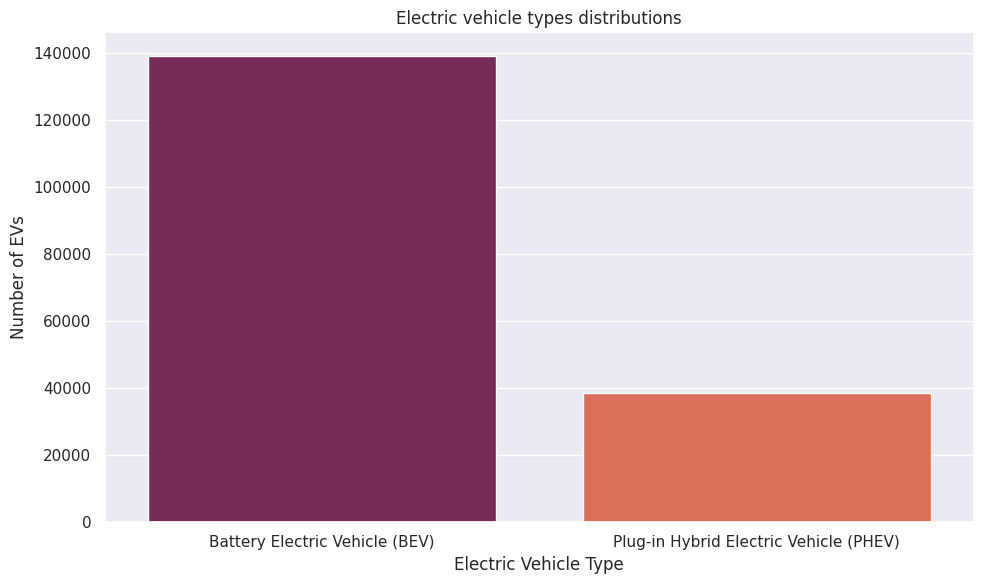

In [7]:
#Electric vehicle types

ev_types = data['Electric Vehicle Type'].value_counts()

print(ev_types)

plt.figure(figsize=(10,6))

sns.barplot(x=ev_types.index, y=ev_types.values, palette="rocket")

plt.title("Electric vehicle types distributions")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Number of EVs")
plt.tight_layout()

plt.show()

Make
TESLA         79659
NISSAN        13998
CHEVROLET     13678
FORD           9199
BMW            7570
KIA            7432
TOYOTA         6288
VOLKSWAGEN     5004
JEEP           4480
HYUNDAI        4406
Name: count, dtype: int64


/tmp/ipython-input-2699451972.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_manufacturer.index, y=ev_manufacturer.values, palette="cubehelix")


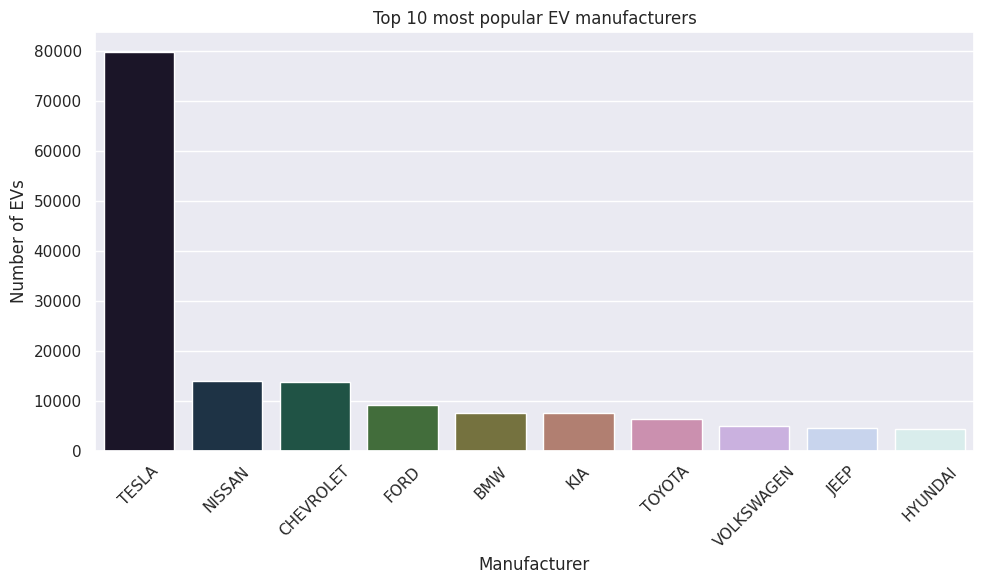

In [8]:
#The most popular manufacturers and we drill down into the most popular models within those manufacturers

ev_manufacturer = data['Make'].value_counts().head(10)

print(ev_manufacturer)

plt.figure(figsize=(10,6))

sns.barplot(x=ev_manufacturer.index, y=ev_manufacturer.values, palette="cubehelix")

plt.title("Top 10 most popular EV manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Make       Model       
TESLA      MODEL Y         35989
           MODEL 3         30092
NISSAN     LEAF            13366
TESLA      MODEL S          7735
CHEVROLET  BOLT EV          6821
TESLA      MODEL X          5796
CHEVROLET  VOLT             4796
           BOLT EUV         1772
NISSAN     ARIYA             632
CHEVROLET  SPARK             241
TESLA      ROADSTER           47
CHEVROLET  SILVERADO EV       33
           BLAZER EV          14
           S-10 PICKUP         1
dtype: int64


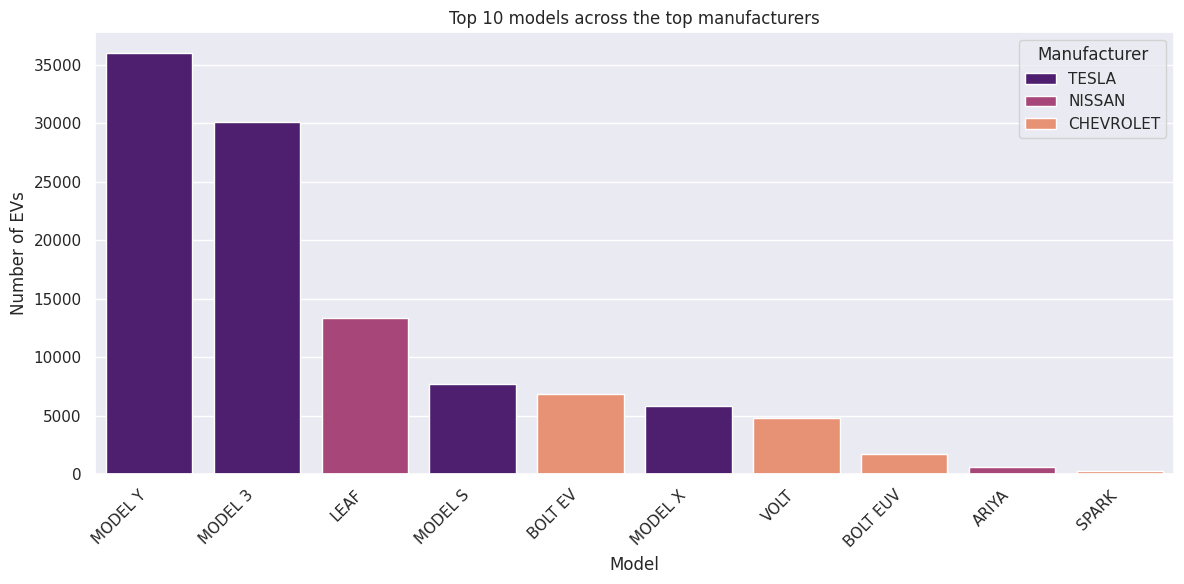

In [9]:
# The most popular models within these top mnufacturers

top_manufacturers = ev_manufacturer.head(3).index

top_manufacturer_data = data[data['Make'].isin(top_manufacturers)]

#Anazlyze the popularity of EV models within the top manufacturers

ev_models = top_manufacturer_data.groupby(['Make','Model']).size().sort_values(ascending=False)

print(ev_models)

#Visulaizing the top 10 models across the top manufacturers

top_models = ev_models.head(10).reset_index()
top_models.columns = ['Manufacturer', 'Model', 'Number of Vehicles']

plt.figure(figsize=(12,6))

sns.barplot(
    x='Model',
    y='Number of Vehicles',
    data=top_models,
    hue='Manufacturer',
    palette="magma"
)

plt.title("Top 10 models across the top manufacturers")
plt.xlabel("Model")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

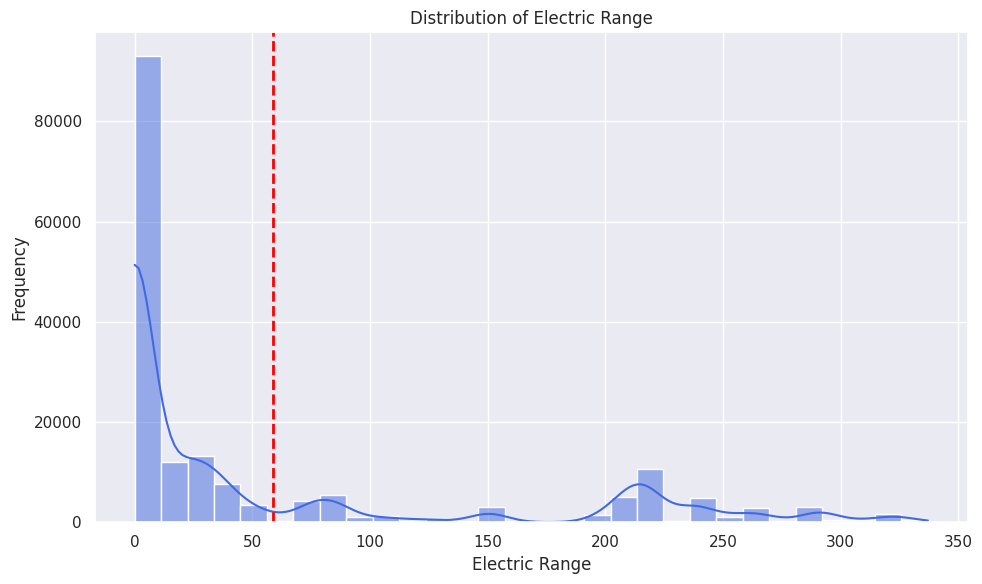

In [10]:
#Analyze the distruibution of electric range

plt.figure(figsize=(10,6))

sns.histplot(data['Electric Range'], bins=30, kde=True, color='royalblue')

plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()

plt.show()

    Model Year  Electric Range
0         1997       39.000000
1         1998       58.000000
2         1999       74.000000
3         2000       58.000000
4         2002       95.000000
5         2003       95.000000
6         2008      220.000000
7         2010      226.086957
8         2011       70.891613
9         2012       61.212608
10        2013       79.852574
11        2014       80.669706
12        2015       98.164740
13        2016      101.279227
14        2017      114.124153
15        2018      156.140194
16        2019      176.892596
17        2020      238.690347
18        2021       11.408426
19        2022        4.523870
20        2023        3.731207
21        2024       16.791667


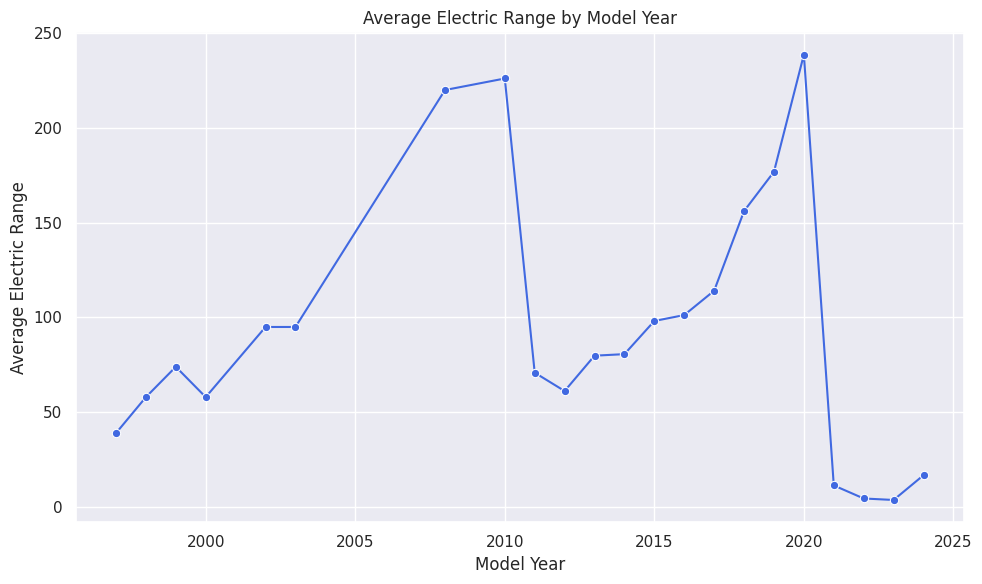

In [12]:
#Calculate the average eletrci range by model years

average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()

print(average_range_by_year)

plt.figure(figsize=(10,6))

sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='royalblue')

plt.title("Average Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Electric Range")
plt.grid(True)
plt.tight_layout()

plt.show()
